In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = 8,4
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (1).csv


In [ ]:
df = pd.read_csv("StudentsPerformance.csv")

In [ ]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74
1,female,group C,some college,standard,completed,69.0,90.0,88
2,female,group B,master's degree,standard,none,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44
4,male,group C,some college,standard,none,76.0,78.0,75


In [ ]:
# Check for possible null values in the dataset as missing values potentially screw the ml models
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     2
reading score                  2
writing score                  0
dtype: int64

In [ ]:
df['math score'].replace('', np.nan, inplace=True)
df['reading score'].replace('', np.nan, inplace=True)
df['math score'].replace(np.nan, df['math score'].median(), inplace=True)
df['reading score'].replace(np.nan, df['reading score'].median(),inplace=True)
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.describe()
# the describe method gives a quick overview of basic metrics of the dataset

,math score,reading score,writing score
count,1003.000000,1003.000000,1003.000000
mean,66.111665,69.157527,68.037886
std,15.157638,14.584297,15.184513
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
df["gender"] = df["gender"].astype("category")
df["race/ethnicity"] = df["race/ethnicity"].astype("category")
df["parental level of education"] = df["parental level of education"].astype("category") 
df["lunch"] = df["lunch"].astype("category")
df["test preparation course"] = df["test preparation course"].astype("category") 

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74
1,female,group C,some college,standard,completed,69.0,90.0,88
2,female,group B,master's degree,standard,none,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44
4,male,group C,some college,standard,none,76.0,78.0,75


In [ ]:
# to get a more generalised idea about performance we add a total score field to the dataset which sums up all exam scores
df["total"] = df["math score"] +df["reading score"]+df["writing score"]

## General Score Analysis

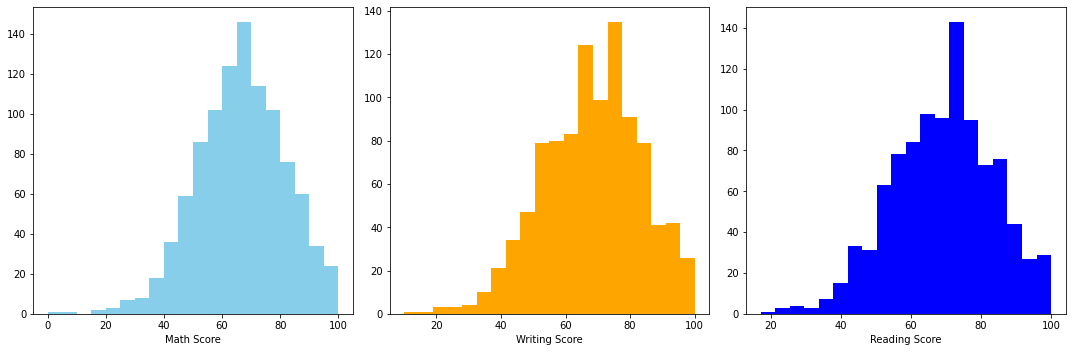

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].hist(df["math score"], bins=20,  color = "skyblue")
axes[0].set_xlabel("Math Score")
axes[1].hist(df["writing score"], bins=20,  color = "orange")
axes[1].set_xlabel("Writing Score")
axes[2].hist(df["reading score"], bins=20,  color = "blue")
axes[2].set_xlabel("Reading Score")

fig.tight_layout()


A visual way of analyzing correlation is to generate the below heatmap from the seaborn library

In [ ]:
dfc= df.drop(columns= "total")
dfc.corr()
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(dfc.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

KeyError: ignored

The above Heatmap shows that there is a high correlation between writing and reading score but less correlation between math score and writing score.

# Gender Analysis

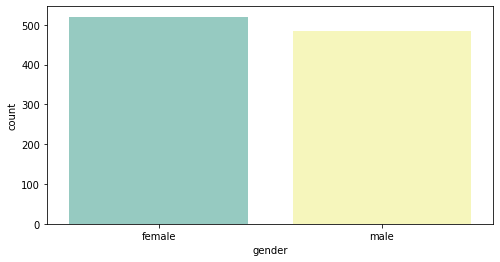

In [ ]:
sns.countplot(x=df["gender"], palette="Set3")
# both genders are representated equally in the data sample

In [ ]:
pl = df.groupby("gender")
pl=pl.mean()
cm = sns.light_palette("green", as_cmap=True)
s= pl.style.background_gradient(cmap=cm)
s

,math score,reading score,writing score,total
gender,,,,
female,63.686538,72.598077,72.403846,208.688462
male,68.722567,65.453416,63.337474,197.513458


The above table compares average exam scores by gender. Male students tend to perform better at maths exams while Females have better reading and writing scores results and a better overall score average.

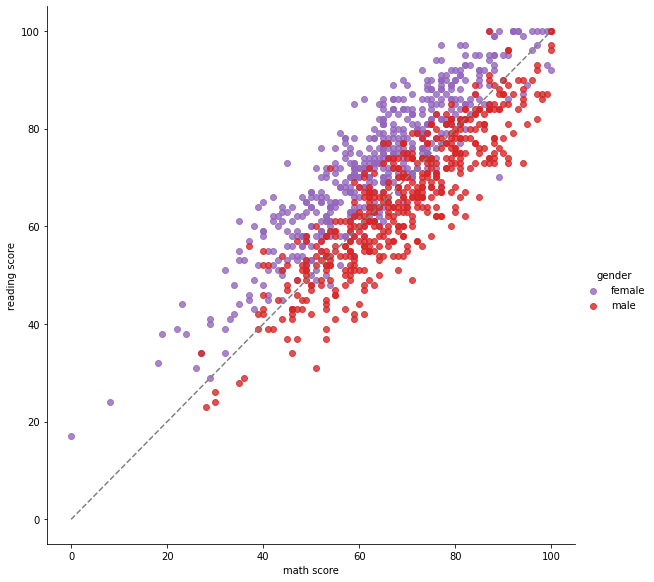

In [ ]:
palette ={"male":"C3","female":"C4"}
vis1= sns.lmplot(data= df, x="math score", y="reading score", fit_reg=False,palette = palette, hue="gender", height=8, aspect=1)
vis1.ax.plot((0,100),(0,100) ,c="gray", ls="--")
plt.show()

The above scatter plot visualizes the high correlation between math and reading score. It can also be seen that the male data points tend to be located below the dashed line while females data point are rather located above.
In the example of a single person a point above the dashed line means that their reading score is higher than their math score.

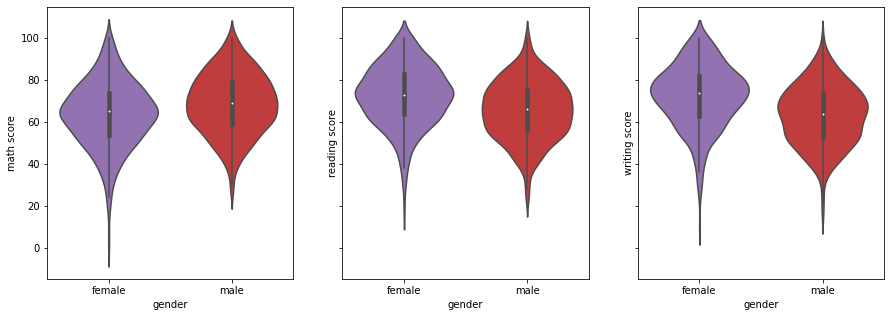

In [ ]:
f, axes = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)
w = sns.violinplot(data=df, x="gender", y="math score",palette = palette,ax=axes[0])
w = sns.violinplot(data=df, x="gender", y="reading score",ax=axes[1]  , palette = palette )
w = sns.violinplot(data=df, x="gender", y="writing score",ax=axes[2], palette = palette)

# Parental Level of Education Analysis

In [ ]:
set(df["parental level of education"])
# these are the distinct values in the parental level of education column

{"associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college',
 'some high school'}

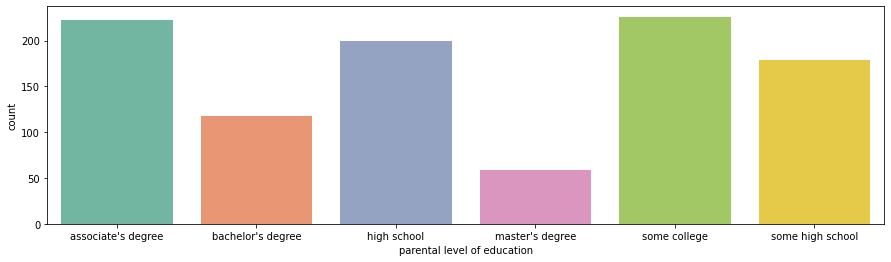

In [ ]:
plt.figure(figsize=(15,4))
ax = sns.countplot(x=df["parental level of education"], palette="Set2")
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)

In [ ]:
len(df[df["parental level of education"]=="master's degree"]) # students where both parents obtain a master's degree

59

In [ ]:
pl = df.groupby("parental level of education")
meanscore_byEducation =pl.mean()
medianscore_byEducation=pl.median()
print(medianscore_byEducation)

                             math score  reading score  writing score  total
parental level of education                                                 
associate's degree                 67.0           72.5           70.5  209.0
bachelor's degree                  68.0           73.0           74.0  213.5
high school                        63.0           66.0           64.0  195.0
master's degree                    73.0           76.0           75.0  220.0
some college                       67.5           70.5           70.0  206.0
some high school                   65.0           67.0           66.0  200.0


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s= meanscore_byEducation.style.background_gradient(cmap=cm)
s

,math score,reading score,writing score,total
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207
bachelor's degree,69.389831,73.000000,73.381356,215.771186
high school,62.311558,64.713568,62.452261,189.477387
master's degree,69.745763,75.372881,75.677966,220.796610
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022


The above table shows that there is a significant difference of student performance in exams for different levels of parent education. Students whose parents graduated with a Master's Degree perform significantly better than students whose parents went to High School only.

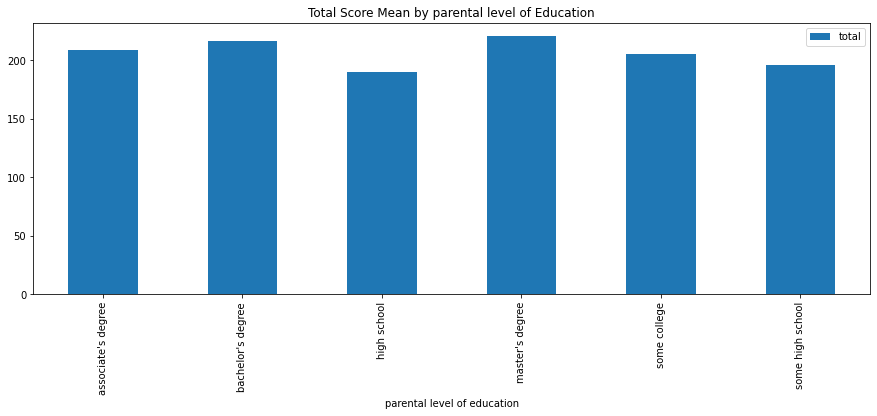

In [ ]:
meanscore_byEducation.plot.bar(y="total",figsize=(15,5) )
plt.title("Total Score Mean by parental level of Education")
plt.show()

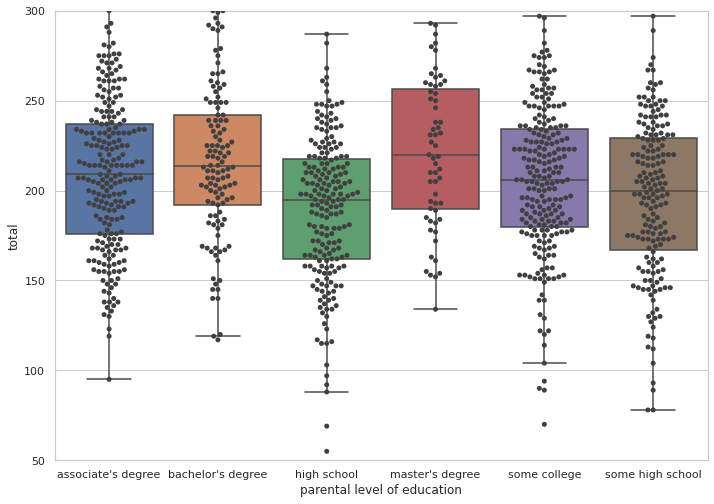

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="parental level of education", y="total", data=df, showfliers = False)
plt.gcf().set_size_inches(11.7, 8.27)
ax = sns.swarmplot(x="parental level of education", y="total", data=df, color=".25")
plt.ylim((50,300))
plt.gcf().set_size_inches(11.7, 8.27)
plt.show()

The above boxplot visualisez the significant better performance of students whose parent have a master's degree in comparison with students whose parent went to High School only.

# Test Preparation Course Analysis

In [ ]:
df["test preparation course"].unique()

['none', 'completed']
Categories (2, object): ['none', 'completed']

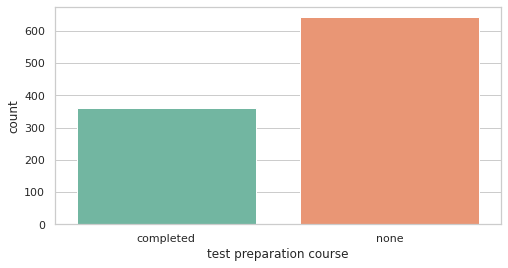

In [ ]:
ax = sns.countplot(x=df["test preparation course"], palette="Set2")

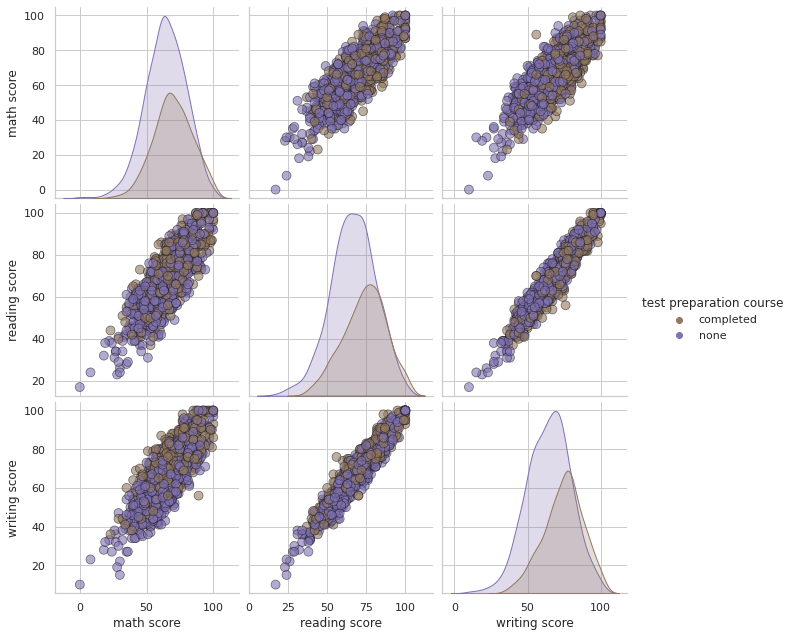

In [ ]:
palette ={"completed":"C5","none":"C4"}
sns.pairplot(df.loc[:, df.columns != 'total'], hue="test preparation course", diag_kind="kde" , palette=palette,plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size=3)

In [ ]:
prep =df.groupby("test preparation course")
prepare_mean = prep.mean()
prepare_mean

,math score,reading score,writing score,total
test preparation course,,,,
completed,69.728532,73.822715,74.321330,217.872576
none,64.077882,66.534268,64.504673,195.116822


Completing the preparation course seems to have a positive effect on the score for all three exams.

#  Logistic Regression

To get insights about students passing the math exam and to predict the performance of students in regards to passing the math exam we add an additional column. The grades are split as follows:
above 50 = Pass<br>
below 50 = Fail<br>

In [ ]:
def failed(mathScore):
    if(mathScore<50): 
        return 1 # failed
    else: 
        return 0 # passed

In [ ]:
#copy data model
prepared_Data = df
#insert column (independent variable)
y = list(map(failed, prepared_Data["math score"]))
prepared_Data["y"] = prepared_Data["math score"].apply(lambda x: failed(x) ) # variable to predict
#delete math score from model as math failed is directly dependent on it
prepared_Data = prepared_Data.drop(columns= ["math score","total", "lunch"] )
prepared_Data.head()

,gender,race/ethnicity,parental level of education,test preparation course,reading score,writing score,y
0,female,group B,bachelor's degree,none,72.0,74,0
1,female,group C,some college,completed,90.0,88,0
2,female,group B,master's degree,none,95.0,93,0
3,male,group A,associate's degree,none,57.0,44,1
4,male,group C,some college,none,78.0,75,0


In [ ]:
total = len(prepared_Data)
failed = len(prepared_Data[prepared_Data["y"] ==1 ])
passed = len(prepared_Data[prepared_Data["y"] ==0 ])
print("Percentage of Students that failed maths:" + str(((failed/total)*100)) +"%")
print("Percentage of Students that passed the maths exam:" + str(((passed/total)*100))  +"%")

Percentage of Students that failed maths:13.459621136590231%
Percentage of Students that passed the maths exam:86.54037886340977%


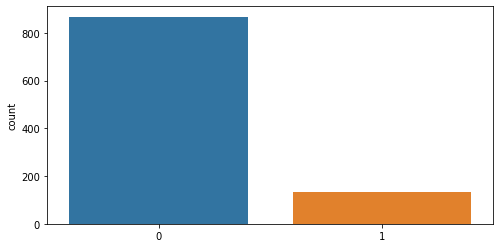

In [ ]:
ax = sns.countplot( x=np.asarray(y))
rcParams['figure.figsize'] = 15, 5

We can see that the dataset is imbalanced which has to be considered when preparing the dataset and training the models.
There are a couple of methods to deal with imbalanced datasets such as oversampling the minority class, undersampling the majority class or changing the Machine Learning Algorithm to a model that performs well to imbalanced datasets such as Decision Trees.

In [ ]:
grouped = prepared_Data.groupby("y").mean()
grouped

,reading score,writing score
y,,
0,72.220046,71.273041
1,49.466667,47.237037


In [ ]:
#get categorical columns so we can generate dummy variables
def is_categorical(array_like):
    return array_like.dtype.name == 'category'

catFilter = [  is_categorical(prepared_Data.iloc[:,i])  for i in range(0, len(prepared_Data.columns) )] 
categoricalCols = prepared_Data.columns[catFilter].tolist()
print(categoricalCols)    

['gender', 'race/ethnicity', 'parental level of education', 'test preparation course']


In [ ]:
#Get dummy variables for all categorical columns
cat_vars= categoricalCols
for var in cat_vars:
    cat_list = "var"+"_" +var
    cat_list = pd.get_dummies(prepared_Data[var],drop_first=True, prefix=var)
    df1= prepared_Data.join(cat_list)
    prepared_Data= df1
prepared_Data.head()

,gender,race/ethnicity,parental level of education,test preparation course,reading score,writing score,y,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_none
0,female,group B,bachelor's degree,none,72.0,74,0,0,1,0,0,0,1,0,0,0,0,1
1,female,group C,some college,completed,90.0,88,0,0,0,1,0,0,0,0,0,1,0,0
2,female,group B,master's degree,none,95.0,93,0,0,1,0,0,0,0,0,1,0,0,1
3,male,group A,associate's degree,none,57.0,44,1,1,0,0,0,0,0,0,0,0,0,1
4,male,group C,some college,none,78.0,75,0,1,0,1,0,0,0,0,0,1,0,1


In [ ]:
#Remove original categorical columns
cat_vars= categoricalCols
data_vars=prepared_Data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
finalDf = prepared_Data[to_keep]
finalDf.head()

,reading score,writing score,y,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_none
0,72.0,74,0,0,1,0,0,0,1,0,0,0,0,1
1,90.0,88,0,0,0,1,0,0,0,0,0,1,0,0
2,95.0,93,0,0,1,0,0,0,0,0,1,0,0,1
3,57.0,44,1,1,0,0,0,0,0,0,0,0,0,1
4,78.0,75,0,1,0,1,0,0,0,0,0,1,0,1


## Oversampling
Because the data set is imbalanced we apply one of the multiple options we have in order to deal with such imbalanced datasets - oversampling. It is important that this oversampling is only done on training data.

In [ ]:
X = finalDf.loc[: , finalDf.columns != "y"]
y = finalDf.loc[: , finalDf.columns == "y"]
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train) #create oversampling on traning data only
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of passed",len(os_data_y[os_data_y['y']==0]))
print("Number of failed",len(os_data_y[os_data_y['y']==1]))
print("Proportion of passed data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of failed data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  1214
Number of passed 607
Number of failed 607
Proportion of passed data in oversampled data is  0.5
Proportion of failed data in oversampled data is  0.5


In [ ]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
finalDf_vars=finalDf.columns.values.tolist()
y=['y']
X=[i for i in finalDf_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
X=os_data_X
y=os_data_y['y']

In [ ]:
## Implementing the Model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.482791
         Iterations 6
                                       Results: Logit
Model:                       Logit                     Pseudo R-squared:          0.303      
Dependent Variable:          y                         AIC:                       1198.2167  
Date:                        2020-11-10 12:38          BIC:                       1264.5384  
No. Observations:            1214                      Log-Likelihood:            -586.11    
Df Model:                    12                        LL-Null:                   -841.48    
Df Residuals:                1201                      LLR p-value:               1.1440e-101
Converged:                   1.0000                    Scale:                     1.0000     
No. Iterations:              6.0000                                                          
--------------------------------------------------------------------------------------------

As the P-Value for all features is below 0.05 we keep all features in the model.

## Train Model

In [ ]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [ ]:
# Creating the Confusion Matrix to visualize the model performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[128   9]
 [  9 158]]


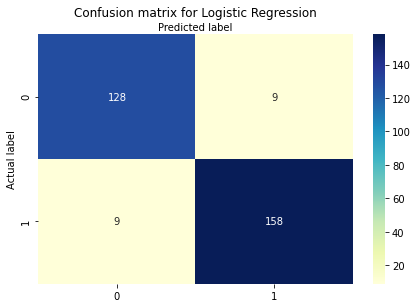

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The above Heatmap shows that our model predicted 128 + 158 cases correctly while 9 + 9 students were incorrectly classified.

In [ ]:
# "accuracy", "precision", "recall"
# Applying k-Fold Cross Validation to test model performance accross different validation subsets
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logreg, X = X_train, y = y_train, cv = 10, scoring="accuracy")
print(accuracies.mean() )
print(accuracies.std() )


0.9175824175824177
0.01648351648351649


## SVM Model

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear' , C=10)  # linear classifier in 2d is straight line
classifierSVM.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

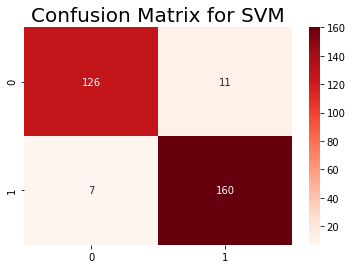

In [ ]:
y_pred2 = classifierSVM.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2,  annot=True, cmap="Reds" ,fmt='g')
plt.title('Confusion Matrix for SVM', fontweight = 30, fontsize = 20)
plt.show()

In [ ]:
accuraciesSVM = cross_val_score(estimator = classifierSVM, X = X_train, y = y_train, cv = 10)
print(accuraciesSVM.mean() )
print(accuraciesSVM.std() )

0.9274725274725275
0.016446845656149196


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the x-test results
y_pred = model.predict(X_test)

# calculating the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9375


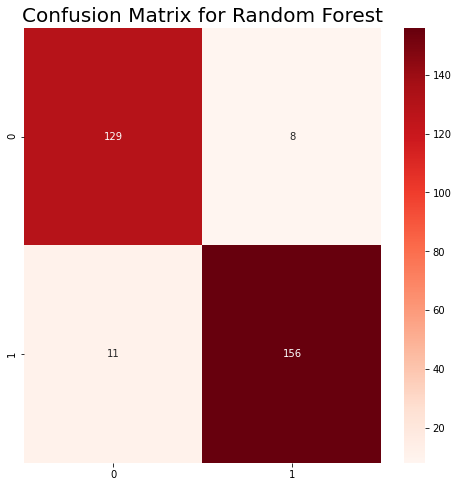

In [ ]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm,  annot=True, cmap="Reds" ,fmt='g')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

In [ ]:
accuraciesRF = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(accuraciesRF.mean() )
print(accuraciesRF.std() )

0.956043956043956
0.016299337334276194
